# Discrete Fourier Transform 

**Discrete Fourier Transform (DFT)** converts a sequence of values which is in the time domain, into components of different frequencies, in the frequency domain. This transformation is fundamental in many areas of science and engineering, including 
- Signal processing: Analyse and filter signal
- Image analysis: Compression and edge detecting 
- Communication: Modulation and demodulation
- Solving partial differential equation

#### Mathematical Expression of DFT:
For a signal in time domain, it has a general form :
$$f(t)= a. \sin(2\pi f t )$$
where 
- $a$ is the amplitude of the signal
- $f$ is the frequency of the signal 
- $t$ is the time 

For a sequence of $x[n]$ of $N$ complex numbers:

$$X[k]=\sum_{n=0}^{N-1} x[n]. e^{-i\frac{2\pi}{N}k n}, \;\;\;\; k = 0,1,...,N-1$$

where
- $N$ is the number of samples
- $n$ is the current sample
- $k$ is the current frequency 
- $x[n]$ is the signal's value at $n$
- $X[K]$ is the DFT at $n$

In this section, we will perform discrete fourier transform (DFT) and its reverse using libraries from `scipy.fftpack` , which include `fft` (for the DFT), and `ifft`(for the inverse DFT), using Python. 

<br>

## Problem:Given three functions

$$f_1(t)=2 sin (2\pi t)$$
$$f_2(t)=2 cos (2\pi t)$$
$$f_3(t)=2 sin (2\pi t)$$


Taking $f(t)=f_1(t)+f_2(t)+f_3(t)$. Perform discrete fourier transform (DFT) and its inverse.

We have 3 sine waves where all of them have a frequency of 1. (Cosine wave is 90 $\degree$ out of phase with sine waves). 

First, let's import libraries

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, fftfreq, ifft

Next, let's define an array of time by considering the rate at which the continuous signal is sample. 

In [2]:
N = 100  # Number of sample
r = 1/N  # Rate
t_start, t_end = 0 , 1
t = np.linspace(t_start,t_end,N) 

#### Original signal
Next, let's generate a combined signal from the individual signals, $f_n(t)$.

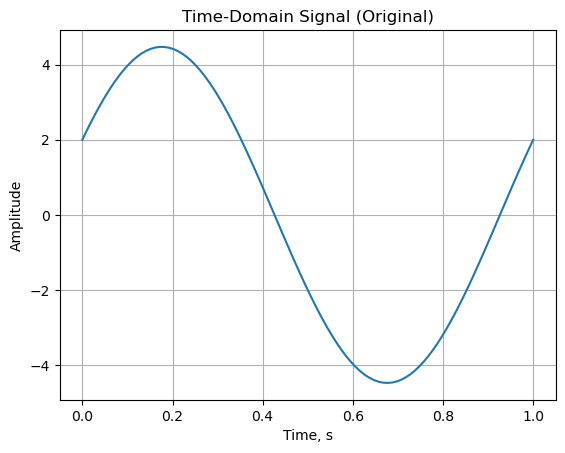

In [3]:
# Individual signal, fn(t)
def f1(t):
    return 2*np.sin(2*np.pi*t)

def f2(t):
    return 2*np.cos(2*np.pi*t)

# Combined signal, y(t)
y = f1(t) + f2(t) + f1(t)

# Plot the combined signal 
plt.plot(t,y)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal (Original)')
plt.grid()
plt.show()

#### Frequency Domain Signal (DFT)

Now, we can apply the DFT operation on the signal, transforming the signal in time domain to signal in frequency domain, using `fft`.

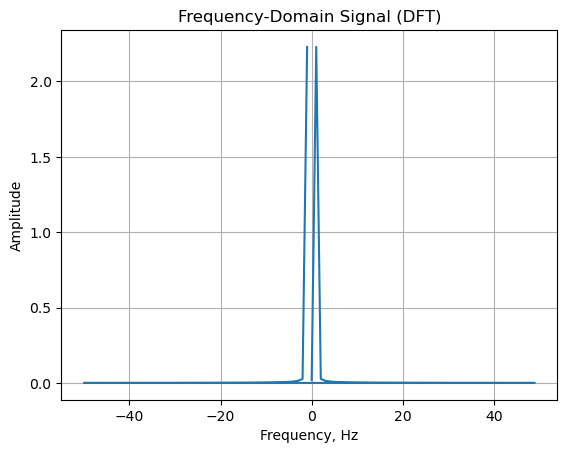

In [4]:
# Perform DFT operation. 
yf = fft(y)  # frequency amplitude 
xf = fftfreq(N,r)

# Normalise the amplitude 
amp = np.abs(yf)/N

# Plot the signal in frequency domain
plt.plot(xf,amp)
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude')
plt.title ('Frequency-Domain Signal (DFT)')
plt.grid()
plt.show()


Since the fast fourier transform result is symmetrical for real-valued signal, we can remove the left part and plot only the positive part. 

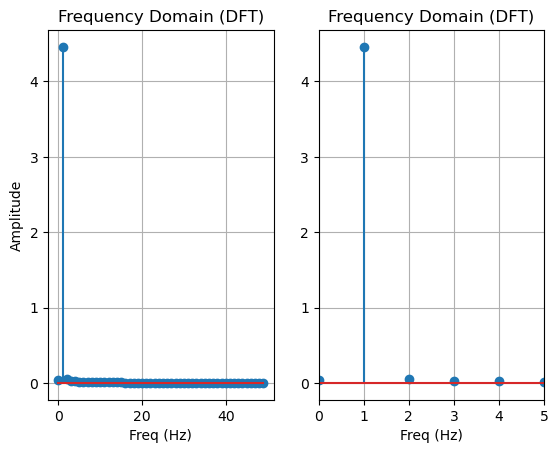

In [5]:
# Select only one-side of the plot 
n_oneside = N // 2
xf_oneside = xf[:n_oneside]
yf_oneside = yf [:n_oneside] / n_oneside

# Plot the one-side Frequency Domain Signal 
plt.subplot(121)
plt.stem(xf_oneside,abs(yf_oneside))
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.title ('Frequency Domain (DFT)')
plt.grid()

plt.subplot(122)
plt.stem(xf_oneside,abs(yf_oneside))
plt.xlabel('Freq (Hz)')
plt.title ('Frequency Domain (DFT)')
plt.xlim(0,5)
plt.grid()
plt.show()


We can clearly see the freuqency of the dominant signal, which is $f=1$. The frequency match those of the sine waves we started out with. The amplitude is the resultant of the three waves. 

#### Time Domain Signal, (IDFT)
Now, let's perform inverse fast fourier transform (IFFT) on the frequency domain signal. The result should get back to the original signal in time domain. 

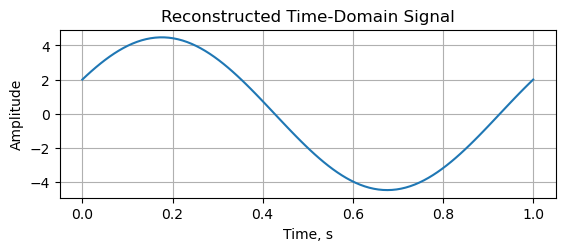

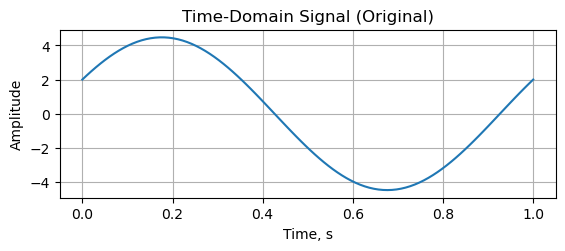

In [6]:
# Perform inverse fft on yf
y_reconstruct = ifft(yf).real

# Plot the reconstructed signal
plt.subplot(211)
plt.plot(t,y_reconstruct)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Reconstructed Time-Domain Signal')
plt.grid()
plt.show()

# Plot the original signal 
plt.subplot(212)
plt.plot(t,y)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal (Original)')
plt.grid()
plt.show()

There is no surprise that applying the inverse fast fourier transform on frequency-domain signal will yield the original time-domain signal.

#### Summary
Finally, let's summarise the DFT and inverse DFT by showing all the plots in sequence. 

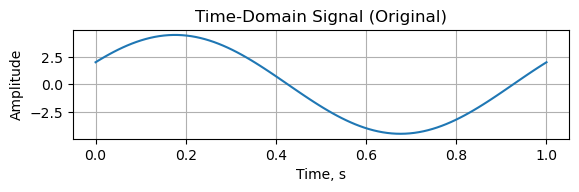

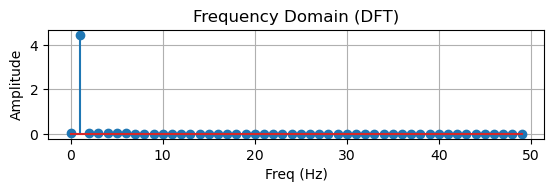

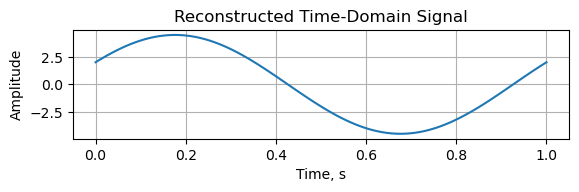

In [7]:
# The original time-domain signal
plt.subplot(311)
plt.plot(t,y)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal (Original)')
plt.grid()
plt.show()

# The frequency-domain signal (DFT)
plt.subplot(312)
plt.stem(xf_oneside,abs(yf_oneside))
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.title ('Frequency Domain (DFT)')
plt.grid()
plt.show()

# The reconstructed time-domain signal 
plt.subplot(313)
plt.plot(t,y_reconstruct)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Reconstructed Time-Domain Signal')
plt.grid()
plt.show()

#### Reference 
1. Medhi, H. (2024, November 18). Implementing the discrete fourier transform in Python. Medium. https://medium.com/@positive.delta.hm/implementing-the-discrete-fourier-transform-in-python-978dedded5bc

2. fft — SciPy v1.14.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html

3.  Lecture 7 -The Discrete Fourier Transform 7.1 The DFT. (n.d.). https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf  